# Import libraries 

In [1]:
import sys
from pathlib import Path
sys.path.insert(0,'..')
import re
import os

import pandas as pd
import matplotlib.pyplot as plt

from src.utils.hdf_tools import load_from_hdf_with_regex
from src.visualisation.visualisation import plot_hdf

# Load mp3 data

In [2]:
df_mp3_fpa = pd.read_csv("../data/RB_TC_extract_2022_07_07_processed_filled.csv")

# Load data from hdf5

In [3]:
# define event to laod
fpa_identifier = {'circuit_type': 'RB',
                 'circuit_name': 'RB.A78',
                 'timestamp_fgc': 1616962174400000000}

file_path = Path('/eos/project/m/ml-for-alarm-system/private/RB_signals/20220707_data')
file_name = f"{fpa_identifier['circuit_type']}_{fpa_identifier['circuit_name']}_{fpa_identifier['timestamp_fgc']}.hdf5"
file_dir = file_path / file_name

# define signals to load
signals = ['I_MEAS','VoltageNQPS.*U_DIODE','VoltageNXCALS.*U_DIODE','I_EARTH_PCNT', 'IEARTH.I_EARTH','U_QS0','U_1','U_2','I_HDS', 'U_HDS','EEUDumpResPM']

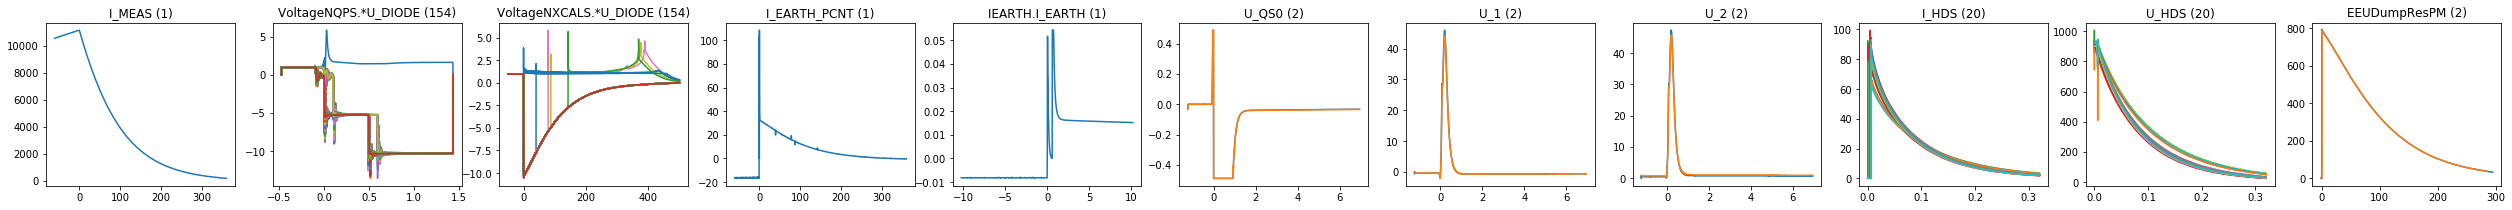

In [4]:
data = load_from_hdf_with_regex(file_dir, regex_list=signals)
plot_hdf(data, column_regex=signals)

In [19]:
l[0].reset_index()

,index,QHPM/A28L8:I_HDS_1
0,0.000046,0.070574
1,0.000052,0.093463
2,0.000057,0.091555
3,0.000062,0.045778
4,0.000067,0.123981
...,...,...
16368,0.319645,2.079066
16369,0.319687,2.077158
16370,0.319729,2.077158
16371,0.319770,2.075251


In [26]:
l = [d for d in data if "HDS" in d.columns.values[0]]

In [28]:
len(l)

40

In [29]:
df = pd.concat(l,ignore_index=True, axis=1)

In [42]:
df.loc[:,[1,22]].rename(columns={1:"I_HDS",22:"U_HDS"}).to_csv("QH_signal_example.csv")

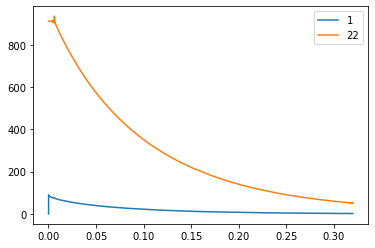

In [34]:
df.loc[:,[1,22]].plot()

# Plot all data

In [ ]:
df_acquisition = pd.read_excel("../data/20220707_acquisition_summary.xlsx")
mp3_fpa_df = pd.read_csv("../data/RB_TC_extract_2022_07_07_processed_filled.csv")

In [ ]:
units = ["A", "V", "V", "%", "A", "V", "V", "V" , "A", "V", "V" , ""]
for j, row in df_acquisition.iterrows():
    
    fig_name = f"{row['date_fgc']}_{row['Circuit Name']}_{j}"
    fig_path = f"/eos/project/m/ml-for-alarm-system/private/RB_signals/20220707_data_visualisation/{fig_name}.png"
    
    if not os.path.isfile(fig_path):
        
        file_name = f"RB_{row['Circuit Name']}_{row['timestamp_fgc']}"
        data = load_from_hdf_with_regex(file_path / (file_name + ".hdf5"), regex_list=signals)
        
        fig, axes = plt.subplots(4, 3, figsize=(4 * 4, 3*5))
        i = 0
        for s, ax in zip(signals, axes.flatten()):
            n_signals = 0
            for df in data:
                if bool(re.search(s, df.columns.values[0])):
                    ax.plot(df.index.values, df.values)
                    n_signals += 1
            ax.set_title(f"{s} ({n_signals})")
            ax.set_xlabel("Time / s")
            ax.set_ylabel(units[i])
            i +=1

        mp3_fpa_df_subset = mp3_fpa_df[(mp3_fpa_df.timestamp_fgc == row['timestamp_fgc']) & (mp3_fpa_df["Circuit Name"] == row['Circuit Name'])]
        quenched_magenets = mp3_fpa_df_subset.Position.values
        quenched_magenets = ''.join(x + " " for x in quenched_magenets)

        fig.delaxes(axes.flatten()[-1])
        fig.tight_layout()
        fig.subplots_adjust(top=0.89)
        title = f"circuit: {row['Circuit Name']} \n date: {row['date_fgc']} \n fgc_timestamp: {row['timestamp_fgc']} \n quenched magnets: {quenched_magenets} "
        fig.suptitle(title)

        plt.savefig(str(fig_path))

        fig.clf()
        plt.clf()
        plt.close(fig)
        del data
        print(f"{j}/{len(df_acquisition)} {file_name}")

# Load acquisition summary

In [ ]:
df_acquisition = pd.read_excel("../data/20220707_acquisition_summary.xlsx")

In [ ]:
(df_acquisition[signals]==1).sum()#.plot.barh()